<a href="https://colab.research.google.com/github/aurora1112-j/aurora1112-j.github.io/blob/main/mathbook/bivariate_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dot Product**

原始标量方程$$y = x_1 + x_2$$

补全系数：$$y = 1 \cdot x_1 + 1 \cdot x_2$$

定义向量，将变量和系数分离：

系数向量 $\mathbf{w} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

变量向量 $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$

根据矩阵乘法规则（行乘以列），把 $\mathbf{w}$ 转置：$$\mathbf{w}^T = [1, \quad 1]$$

$$y = \mathbf{w}^T \mathbf{x} = \underbrace{\begin{bmatrix} 1 & 1 \end{bmatrix}}_{\text{行向量 (1x2)}} \times \underbrace{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}}_{\text{列向量 (2x1)}}$$

**计算规则是：第一个数乘第一个数，加上第二个数乘第二个数**

结果：$$y = 1 \cdot x_1 + 1 \cdot x_2$$

**实现了降维！**



---



线性函数 $f(x_1, x_2)$的向量化 (Vectorization)：把简单的加法变成了向量点积（Dot Product）

$\mathbf{w} = [1, 1]^{\text{T}}$ 是权重向量 (Weight Vector)

$\mathbf{x} = [x_1, x_2]^{\text{T}}$ 是特征向量 (Feature Vector)

## Tensor Product （outer product）

符号表示：$\mathbf{v} \otimes \mathbf{u}$ 或 $\mathbf{v}\mathbf{u}^T$

运算：乘法表模型

列向量 $\mathbf{y}$ 提供“行权重”。

行向量 $\mathbf{x}$ 提供“列权重”。

生成的矩阵网格中，每个点的值 $=$ 对应的行头 $\times$ 列头。

升维 (Dimensionality Expansion)。将两个一维向量相乘，生成一个二维矩阵

# 二元一次函数：平面

In [ ]:
import math  # 导入math库，用于数学运算
import numpy as np  # 导入numpy库，用于数值计算
import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图
from matplotlib import cm  # 导入matplotlib的cm模块，用于配色

def mesh_square(x1_0, x2_0, r, num):  # 生成网格，设置网格中心及半径和网格点数量

    rr = np.linspace(-r, r, num)  # 生成范围为[-r, r]的网格点
    xx1, xx2 = np.meshgrid(rr, rr);  # 创建x1和x2的网格

    xx1 = xx1 + x1_0;  # 平移网格中心到x1_0
    xx2 = xx2 + x2_0;  # 平移网格中心到x2_0

    return xx1, xx2  # 返回x1和x2的网格

def plot_surf(xx1, xx2, ff, caption):  # 绘制三维曲面

    norm_plt = plt.Normalize(ff.min(), ff.max())  # 标准化颜色范围
    colors = cm.coolwarm(norm_plt(ff))  # 为曲面配色

    fig = plt.figure()  # 创建图形
    ax = fig.add_subplot(projection='3d')  # 创建三维坐标轴
    surf = ax.plot_surface(xx1, xx2, ff, facecolors=colors, shade=False)  # 绘制曲面
    surf.set_facecolor((0, 0, 0, 0))  # 设置透明背景

    plt.tight_layout()  # 自动调整布局
    ax.set_xlabel(r'$\it{x_1}$')  # 设置x轴标签
    ax.set_ylabel(r'$\it{x_2}$')  # 设置y轴标签
    ax.set_zlabel(r'$\it{f}$($\it{x_1}$,$\it{x_2}$)')  # 设置z轴标签
    ax.set_title(caption)  # 设置标题
    ax.set_proj_type('ortho')
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # x轴网格
    ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # y轴网格
    ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # z轴网格

    plt.rcParams["font.family"] = "serif"  # 设置字体
    plt.rcParams["font.size"] = "10"  # 设置字体大小


def plot_contourf(xx1, xx2, ff, caption):  # 绘制等高线填充图

    fig, ax = plt.subplots()  # 创建图形和坐标轴
    cntr2 = ax.contourf(xx1, xx2, ff, levels=15, cmap="RdBu_r")  # 绘制填充等高线图

    fig.colorbar(cntr2, ax=ax)  # 添加颜色条
    ax.set_xlabel(r'$\it{x_1}$')  # 设置x轴标签
    ax.set_ylabel(r'$\it{x_2}$')  # 设置y轴标签
    ax.set_title(caption)  # 设置标题
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格线


x1_0 = 0  # 网格中心的x1坐标
x2_0 = 0  # 网格中心的x2坐标
r = 2  # 网格半径
num = 30  # 网格点数量
xx1, xx2 = mesh_square(x1_0, x2_0, r, num)  # 生成正方形网格

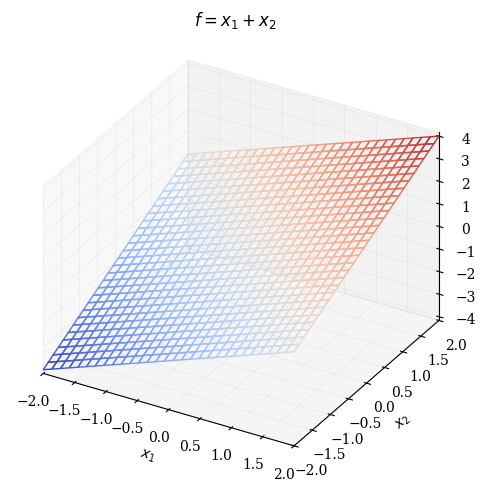

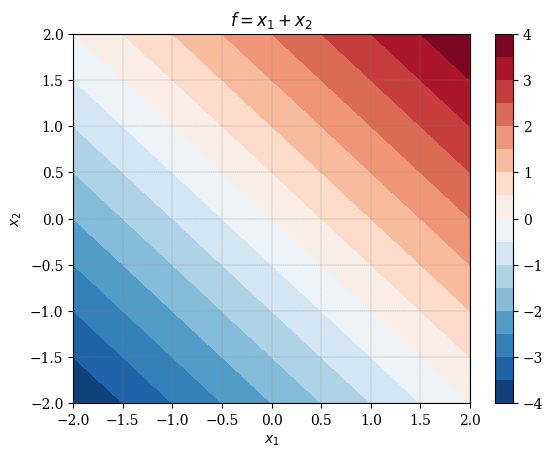

In [ ]:
# f(x1,x2) = x1 + x2
ff = xx1 + xx2;  # 定义函数
caption = r'$\it{f} = \it{x_1} + \it{x_2}$';  # 设置标题

plot_surf(xx1, xx2, ff, caption)  # 绘制曲面图
plot_contourf(xx1, xx2, ff, caption)  # 绘制等高线图



* 平面的含义：因为 $f(x_1, x_2)$ 是线性的（没有平方，没有曲线），所以画在三维空间里，它必然是一个平坦的平面 (Plane)

图（a）

* 红色区域 (Red)：$y > 0$。也就是 $x_1 + x_2$ 是正数。对应上面的网格向上翘起的部分
* 蓝色区域 (Blue)：$y < 0$。也就是 $x_1 + x_2$ 是负数。对应网格向下凹陷的部分



*   黑色实线：这是 $y=0$ 的地方。在这个高度上，平面刚好穿过 $x_1-x_2$ 的地平面。这被称为零势面


图（b）



*   黑色对角线 ($x_1 + x_2 = 0$)：图 (a) 中那条黑线的投影；机器学习中，这叫决策边界 (Decision Boundary)
*  所有的颜色带都是平行的直条纹，说明斜率是固定的（线性函数的特征）



# Discrete Distribution: Joint PMF

## 1. The Matrix Representation



如果 $X$ 取值 $x_1, ..., x_n$， $Y$ 取值 $y_1, ..., y_m$，它们的联合分布就是一个 $n \times m$ 的矩阵 $\mathbf{P}$。$$\mathbf{P} = \begin{bmatrix}
p_{11} & p_{12} & \cdots & p_{1m} \\
p_{21} & p_{22} & \cdots & p_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
p_{n1} & p_{n2} & \cdots & p_{nm}
\end{bmatrix}$$

其中，矩阵中的每一个元素 $p_{ij}$ 代表两个事件同时发生的概率：$$p_{ij} = P(X=x_i, Y=y_j)$$

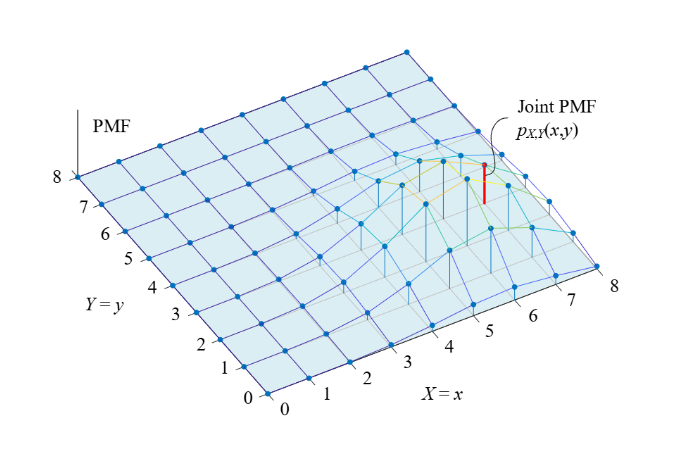



---



1. 归一化 (Normalization)：整个矩阵所有元素加起来必须等于 1（所有可能情况的总和）。$$\sum_{i} \sum_{j} p_{ij} = 1$$

2. 边缘分布 (Marginal Distribution)：

   把每一行加起来（Row Sum）：得到 $X$ 的分布 $P(X=x_i)$。
   
   把每一列加起来（Col Sum）：得到 $Y$ 的分布 $P(Y=y_j)$。

## Marginal Probability




### **1.   Total Probability**





$$p_X(x) = \sum_{y} p_{X,Y}(x,y)$$

偏求和 (Partial Summation)：在求和符号 $\sum_y$ 的作用下，变量 $y$ 遍历了其所有取值并完成了累加，因此在结果中 $y$ 消失了，只剩下 $x$



---








### **2.   Functional View**




$p_{X,Y}(x,y)$ 是一个 二元函数 (Bivariate Function)，$p_X(x)$ 是一个 一元函数 (Univariate Function)

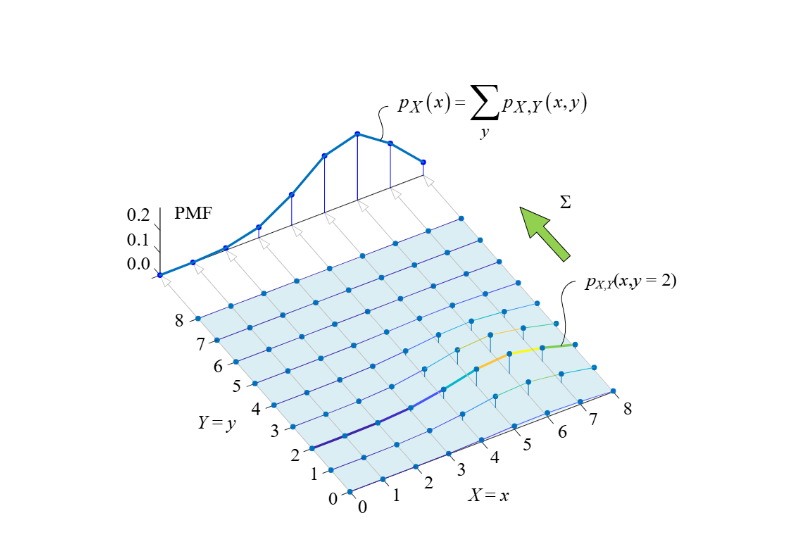



---



### **3. Matrix/Geometric View**



沿 $Y$ 方向求和：对应图中红色的向下箭头 $\downarrow$。这意味着固定住每一列（代表一个具体的 $x$），然后把这一列里所有的 $y$ 值加起来。

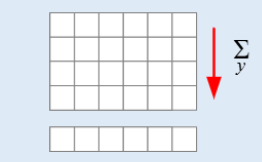

整个二维矩阵被“拍扁”成了一个 行向量 (Row Vector)。这个行向量的每一个元素，就是对应 $x$ 的边缘概率



---




### **4. Conditional Probability**

从条件概率到联合概率：

条件概率 $p_{X|Y}(x|y)$ 是 $X$ 在样本空间 $Y=y$ 上发生的概率，要把它放在全局的样本空间中，就需要乘以这个局部在全局中的权重，即 $Y$ 的边缘概率

$$p_{X,Y}(x,y) = \underbrace{p_{X|Y}(x|y)}_{\text{Local Slice}} \times \underbrace{p_Y(y)}_{\text{Scale Factor}}$$

加权平均——边缘概率：（全概率公式）

$$p_X(x) = \sum_y \underbrace{p_{X|Y}(x|y)}_{\text{Probability in scenario } y} \times \underbrace{p_Y(y)}_{\text{Weight of scenario } y}$$



---



### **5. Independency**

$$p_{X|Y}(x|y) = p_X(x)$$

$$p_{X|Y}(x|y) = p_Y(y)$$

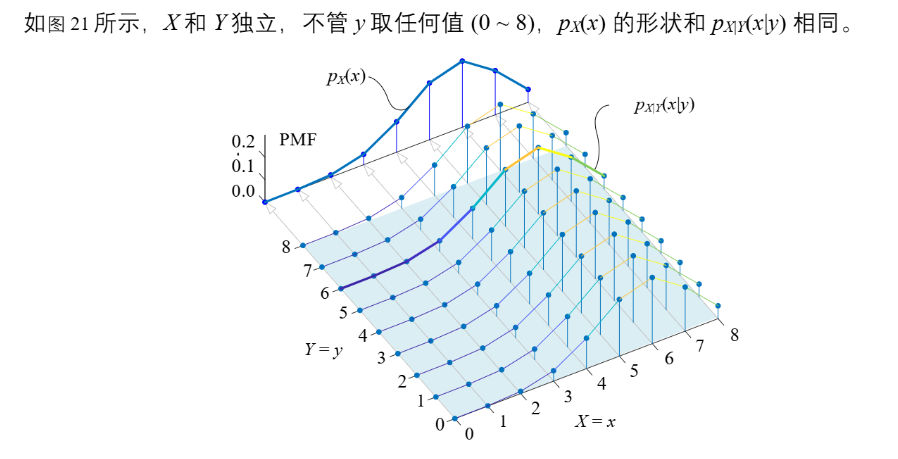

* joint probability: $$p_{X,Y}(x,y) = p_X(x) \cdot p_Y(y)$$

**Tensor Product:**

当两个随机变量 $X, Y$ 独立时，它们的联合概率分布矩阵 $P_{X,Y}$ 等于边缘概率向量的张量积。$$P_{X,Y} = p_Y \otimes p_X$$


这意味着这个复杂的二维矩阵，其实只包含两个一维向量的信息量，没有额外的“纠缠”信息。

## Calculation techs

**等比数列求和核心公式**

设首项为 $a$，公比为 $q$（即每一项是前一项乘以 $q$）。

通项公式：$a_n = a \cdot q^{n-1}$

前 n 项和公式（有限项）：$$S_n = \frac{a(1-q^n)}{1-q}$$

无穷递缩等比数列求和（最常用）：当公比的绝对值 $|q| < 1$ 时，项数趋于无穷大，$q^n$ 趋于 0。此时和为：$$S_{\infty} = \frac{a}{1-q}$$

常见的无穷离散分布: 几何分布（Geometric Distribution）

其概率形式为 $$p(1-p)^{k-1}$$

# Continuous Distribution: Joint CDF

积分区域：$$A = \{(x,y) | a < x < b, c < y < d\}$$

$$\text{Pr}((X,Y) \in A) = \int_c^d \int_a^b f_{X,Y}(x,y) dx dy$$

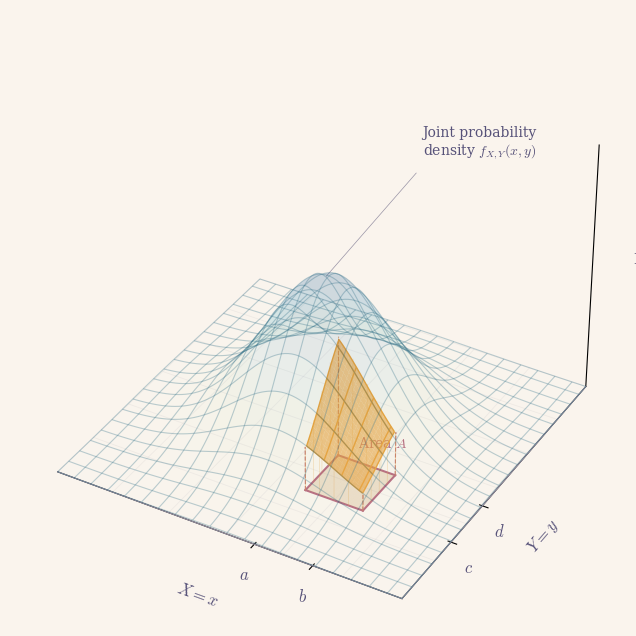

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# ==========================================
# 1. Rose Pine Dawn 配色方案配置
# ==========================================
theme = {
    'base':    '#faf4ed',  # 背景米白
    'surface': '#fffaf3',  # 高亮背景
    'text':    '#575279',  # 深紫灰文本
    'subtle':  '#9893a5',  # 浅灰（用于网格/辅助线）
    'pine':    '#286983',  # 深蓝 (用于主曲面线条)
    'foam':    '#56949f',  # 浅蓝 (用于曲面填充)
    'gold':    '#ea9d34',  # 金色 (用于高亮积分区域)
    'love':    '#b4637a',  # 红色 (用于边界线)
    'iris':    '#907aa9'   # 紫色 (用于辅助)
}

# 全局字体与背景设置
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['figure.facecolor'] = theme['base']
plt.rcParams['axes.facecolor'] = theme['base']

# ==========================================
# 2. 数据生成
# ==========================================
# 定义网格范围
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# 定义联合概率密度函数 (二元高斯分布)
def pdf(x, y):
    return (1 / (2 * np.pi)) * np.exp(-0.5 * (x**2 + y**2)) * 0.8 # 乘以0.8调整视觉高度

Z = pdf(X, Y)

# 定义积分区域 A: [a, b] x [c, d]
a, b = 0.5, 1.5   # X 轴范围
c, d = -1.5, -0.5 # Y 轴范围

# ==========================================
# 3. 绘图主逻辑
# ==========================================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# --- A. 绘制主曲面 (The Joint PDF Surface) ---
# 使用 plot_surface 绘制半透明底色
surf = ax.plot_surface(X, Y, Z, cmap='GnBu', alpha=0.1, rstride=5, cstride=5, edgecolor='none')
# 使用 plot_wireframe 绘制深色网格线 (Pine color)
ax.plot_wireframe(X, Y, Z, color=theme['pine'], rstride=5, cstride=5, alpha=0.3, linewidth=0.8)

# --- B. 绘制积分区域的高亮柱体 (The Integral Volume) ---
# 1. 提取区域 A 的数据
mask = (x >= a) & (x <= b)
mask_y = (y >= c) & (y <= d)
X_sub, Y_sub = np.meshgrid(x[mask], y[mask_y])
Z_sub = pdf(X_sub, Y_sub)

# 2. 绘制区域 A 顶部的曲面 (金色)
ax.plot_surface(X_sub, Y_sub, Z_sub, color=theme['gold'], alpha=0.6, shade=False, zorder=10)
ax.plot_wireframe(X_sub, Y_sub, Z_sub, color=theme['gold'], rstride=5, cstride=5, alpha=1.0, linewidth=1)

# 3. 绘制区域 A底部的投影矩形 (红色边框)
# 画四条边
z_floor = 0
ax.plot([a, b], [c, c], [z_floor, z_floor], color=theme['love'], lw=1.5)
ax.plot([a, b], [d, d], [z_floor, z_floor], color=theme['love'], lw=1.5)
ax.plot([a, a], [c, d], [z_floor, z_floor], color=theme['love'], lw=1.5)
ax.plot([b, b], [c, d], [z_floor, z_floor], color=theme['love'], lw=1.5)

# 填充底部矩形颜色
# 注意：3D填充比较麻烦，这里用半透明面代替
ax.plot_surface(X_sub, Y_sub, np.zeros_like(Z_sub), color=theme['gold'], alpha=0.2)

# 4. 绘制垂直立柱 (Visualizing the Volume)
# 在四个角画垂直线
corners = [(a, c), (a, d), (b, c), (b, d)]
for (cx, cy) in corners:
    cz = pdf(cx, cy)
    ax.plot([cx, cx], [cy, cy], [0, cz], color=theme['love'], linestyle='--', linewidth=0.8)

# 为了增强体积感，在边界每隔一段画一条垂线
# 沿 X 轴边界
for i in np.linspace(a, b, 5):
    z_c = pdf(i, c)
    z_d = pdf(i, d)
    ax.plot([i, i], [c, c], [0, z_c], color=theme['gold'], alpha=0.3, lw=0.5)
    ax.plot([i, i], [d, d], [0, z_d], color=theme['gold'], alpha=0.3, lw=0.5)
# 沿 Y 轴边界
for j in np.linspace(c, d, 5):
    z_a = pdf(a, j)
    z_b = pdf(b, j)
    ax.plot([a, a], [j, j], [0, z_a], color=theme['gold'], alpha=0.3, lw=0.5)
    ax.plot([b, b], [j, j], [0, z_b], color=theme['gold'], alpha=0.3, lw=0.5)

# ==========================================
# 4. 坐标轴与标注细节
# ==========================================

# 视角设置
ax.view_init(elev=35, azim=-60)

# 坐标轴范围与隐藏背景
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, 0.2)
ax.set_xlabel(r'$X=x$', fontsize=12, labelpad=10, color=theme['text'])
ax.set_ylabel(r'$Y=y$', fontsize=12, labelpad=10, color=theme['text'])
ax.set_zlabel('PDF', fontsize=10, color=theme['text'])

# 隐藏默认的灰色背景板
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.grid(False) # 关闭默认网格

# 自定义刻度标签 (a, b, c, d)
ax.set_xticks([a, b])
ax.set_xticklabels(['$a$', '$b$'], fontsize=12, color=theme['text'])
ax.set_yticks([c, d])
ax.set_yticklabels(['$c$', '$d$'], fontsize=12, color=theme['text'])
ax.set_zticks([]) # 隐藏Z轴刻度

# 添加标注线和文本
# 标注积分区域 A
ax.text((a+b)/2, d+0.5, 0, r'Area $A$', color=theme['love'], fontsize=10, ha='center')

# 标注 Joint PDF
ax.text(0, 3, 0.15, 'Joint probability\ndensity $f_{X,Y}(x,y)$',
        color=theme['text'], fontsize=10)
# 画一个箭头指向曲面顶端
ax.plot([0, 0], [2.8, 0], [0.14, pdf(0,0)], color=theme['subtle'], lw=0.5, linestyle='-')


grid_alpha = 0.12  # 设置极低的透明度
grid_color = theme['subtle']
grid_lw = 0.6
# 绘制平行于 Y 轴的线
for xi in np.arange(-3, 4, 1):
    ax.plot([xi, xi], [-3, 3], [0, 0], color=grid_color, alpha=grid_alpha, lw=grid_lw, zorder=0)
# 绘制平行于 X 轴的线
for yi in np.arange(-3, 4, 1):
    ax.plot([-3, 3], [yi, yi], [0, 0], color=grid_color, alpha=grid_alpha, lw=grid_lw, zorder=0)

# 绘制原本的坐标轴线 (更美观)
ax.plot([-3, 3], [-3, -3], [0, 0], color=theme['subtle'], lw=0.8) # X轴
ax.plot([3, 3], [-3, 3], [0, 0], color=theme['subtle'], lw=0.8)   # Y轴

plt.show()

## Double Integral

给定积分区域: $$D={(x,y)∣a<x<b,  c<y<d},D=\{(x,y)\mid a<x<b,\;c<y<d\}$$


$$\int_c^d \int_a^b f(x,y)\,dx\,dy$$

先对 $x$ 积分 : 先消去 $x$ ，变成有关 $y$ 的一元函数（实际上是偏导数的逆过程） $$\int_c^d [\int_a^b f(x,y) \,dx] \,dy$$



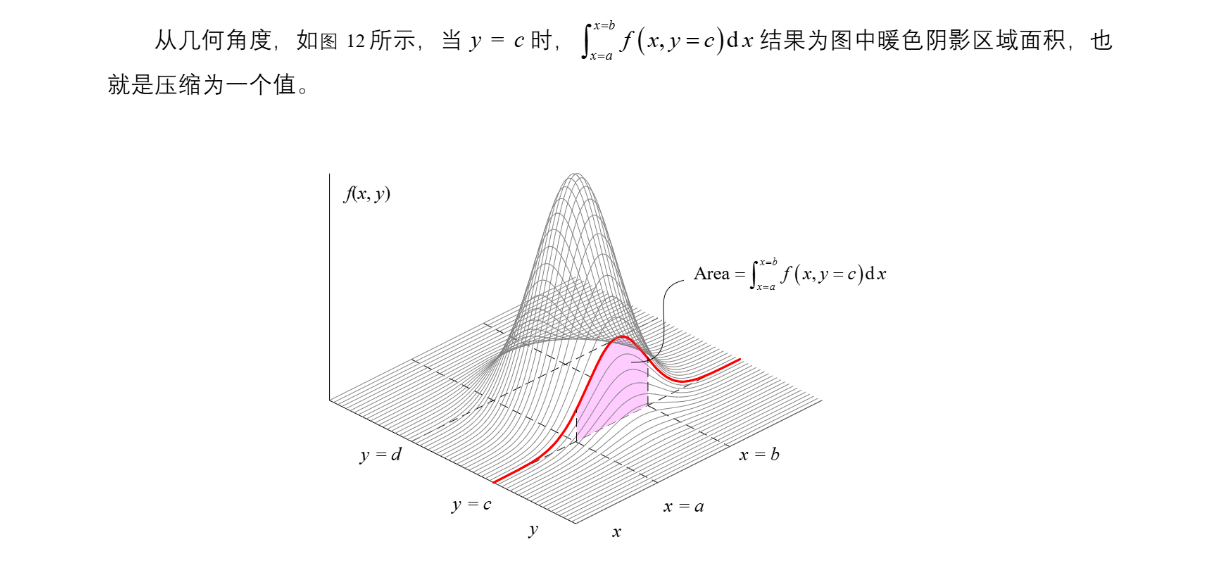

第二步 (Outer Integral $\int dy$)：积 $y$

把所有不同位置 $y$ 切出来的“截面面积”加起来

### * Uniform Distribution

设二维随机变量 $(X, Y)$ 在区域 $D$ （总的样本空间）上服从均匀分布。区域 $D$ 的面积记为 $S_D$

则双重积分后的**体积**等于**底面积** x **高（概率密度，在均匀分布中是一个常数）**

由于总体积必须为1，故概率密度（高） = $\frac{1}{S_D}$

$f(x,y)$ =\begin{cases}
\frac{1}{S_D}, & (x,y) \in D \\
0, & \text{其他}
\end{cases}

计算 $(X, Y)$ 落在子区域 $A$ 内的概率 $P((X,Y) \in A)$：\begin{align*}
  P(A) &= \iint_{A} f(x,y) \, dx \, dy \\
       &= \iint_{A} \frac{1}{S_D} \, dx \, dy \quad (\text{$\frac{1}{S_D}$是常数}) \\
       &= \frac{1}{S_D} \underbrace{\iint_{A} 1 \, dx \, dy}_{\text{底面积 } S_A} \\
       &= \frac{S_A}{S_D}
\end{align*}

$$\iint_A f(x,y) dx dy \quad \xrightarrow{} \quad \frac{\text{目标区域 } A \text{ 的面积}}{\text{总区域 } D \text{ 的面积}}$$

## Partial Derivative

因为变量有很多（权重 $w_1, w_2, \dots$），我们不能一下子分析所有方向。偏导数告诉我们：“如果我们只调整其中一个变量，结果会如何变化？”这是控制变量法在微积分中的体现。

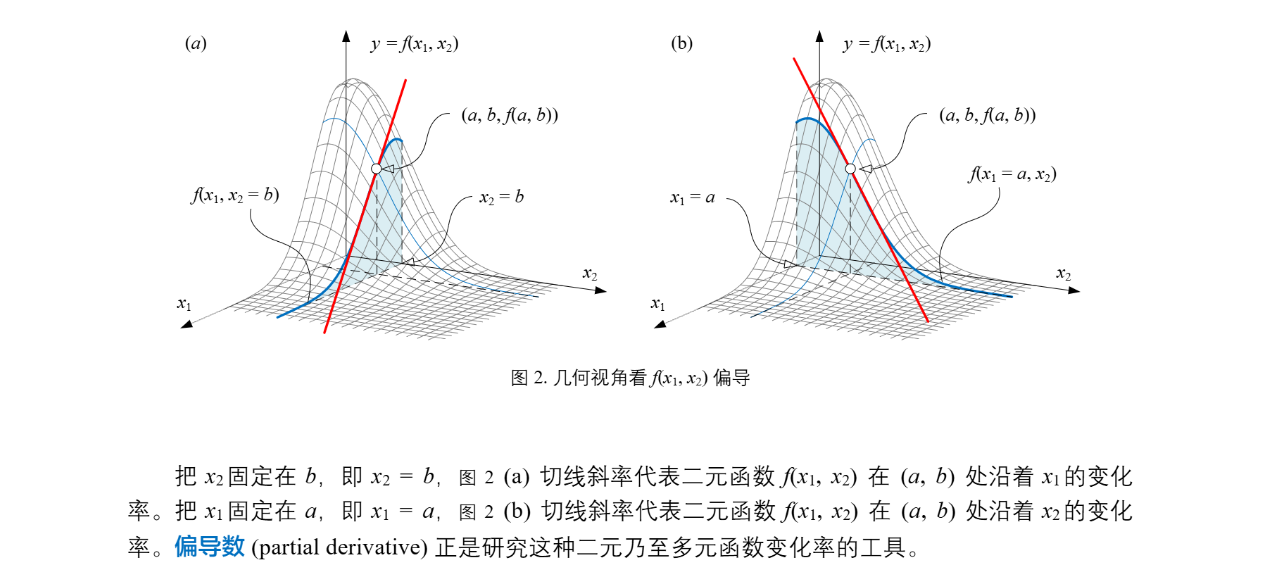

对于函数 $f(x_1, x_2)$ ，将 $x_2$ 固定在 $x_2 = b$ ，函数变为关于 $x_1$ 的函数 $g(x_1) = f(x_1, b)$

 $f(x_1, x_2)$ 在  $x_1 = a$ 处关于 $x_1$ 可导（partially differentiable）

求极限 (Taking the Limit):$$\frac{\partial f}{\partial x_1} \bigg|_{(a,b)} = \lim_{\Delta x_1 \to 0} \frac{f(a + \Delta x_1, \mathbf{b}) - f(a, \mathbf{b})}{\Delta x_1}$$

* 与二重积分的联系：偏导数是切片后求斜率，二重积分是切片后求面积，再累加成体积。

根据微积分基本定理 (Fundamental Theorem of Calculus, FTC)：$$\frac{d}{dx} \int_a^x g(t) dt = g(x)$$

**对变上限积分求导，等于被积函数在上限处的值。**

被积函数表示面积，对积分求导则是面积增量 (Geometric Derivation)的变化率

求导结果等于曲线的高度，在PDF中则是概率密度

定义一个二重积分：$$F(x,y) = \int_{-\infty}^{y} \left[ \int_{-\infty}^{x} f(u,v) \, du \right] \, dv$$

令括号内的部分为 $H(x, v) = \int_{-\infty}^{x} f(u,v) \, du$。
那么 $F(x,y) = \int_{-\infty}^{y} H(x, v) \, dv$。

先对 $y$ 求偏导 ($\frac{\partial}{\partial y}$)，即对最外层的积分（关于 $v$ 的积分）求导：$$\begin{aligned}
\frac{\partial F(x,y)}{\partial y} &= \frac{\partial}{\partial y} \int_{-\infty}^{y} \underbrace{\left( \int_{-\infty}^{x} f(u,v) \, du \right)}_{H(x,v)} \, dv \\
&= H(x, y)\\
&= \int_{-\infty}^{x} f(u,y) \, du
\end{aligned}$$

这一步得到的是边缘密度的一部分，或者说是固定 $y$ 时，关于 $x$ 的累积分布的导数

再对 $x$ 求偏导 ($\frac{\partial}{\partial x}$)，此时 $y$ 视为常数：

$$\begin{aligned}
\frac{\partial^2 F(x,y)}{\partial x \partial y} &= \frac{\partial}{\partial x} \left( \frac{\partial F}{\partial y} \right) \\
&= \frac{\partial}{\partial x} \left( \int_{-\infty}^{x} f(u,y) \, du \right)
\end{aligned}$$

FTC: $$\frac{\partial}{\partial x} \int_{-\infty}^{x} f(u,y) \, du = f(x,y)$$

**PDF 其实是 CDF 的混合二阶偏导数**：

$$f(x,y) = \frac{\partial^2 F(x,y)}{\partial x \partial y}$$

即，对$F(x, y)$ 求两次导，得到$f(x, y)$



---



### Convolution Formula

1. 定义分布函数$$F_Z(z) = P(Z \le z) = P(X + Y \le z)$$

2. 转化为二重积分$$= \iint_{x+y \le z} f(x, y) dx dy$$

3. 将二重积分化为累次积分$$= \int_{-\infty}^{+\infty} dx \int_{-\infty}^{z-x} f(x, y) dy$$

4. 求导得到概率密度函数 (PDF)$$f_Z(z) = F'_Z(z)$$

5. 变限积分求导  $\frac{d}{dz} F_Z(z)$： $$f_Z(z) = \int_{-\infty}^{+\infty} \left[ \frac{d}{dz} \int_{-\infty}^{z-x} f(x, y) dy \right] dx$$

6. (Leibniz Integral Rule)，先对内层积分对 $z$ 求导：$$f(x, z-x) \cdot 1 = f(x, z-x)$$
与外层合并：
$$f_Z(z) = \int_{-\infty}^{+\infty} f(x, z-x) dx$$

若 $X, Y$ 相互独立，则$$f_Z(z) = \int_{-\infty}^{+\infty} f_X(x)f_Y(z-x)dx = f_X(z) * f_Y(z)$$



---



##Marginal PDF & CDF

对于连续随机变量 $(X, Y)$，其边缘概率密度函数定义为：$$f_X(x) = \int_{-\infty}^{+\infty} f_{X,Y}(x,y) \, dy$$$$f_Y(y) = \int_{-\infty}^{+\infty} f_{X,Y}(x,y) \, dx$$

求 $X$ 的边缘密度，就对 $Y$ 积分（降维、压扁、折叠），反之同理

在实际计算中，积分范围取决于联合密度函数非零的区域

$$f_X(x) = \int_{y_{min}(x)}^{y_{max}(x)} f_{X,Y}(x,y) \, dy$$

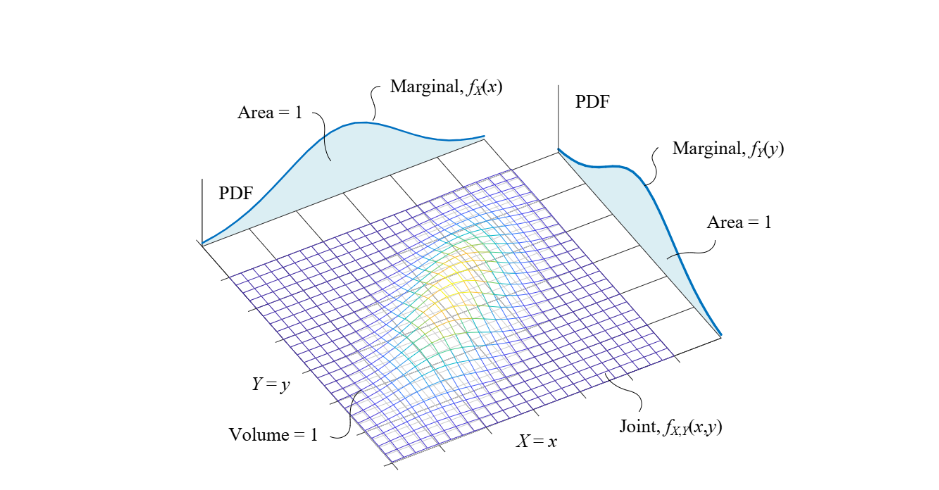

* $f_{X,Y}(x,y)$ “偏积分” 得到的 $f_X(x)$ （面积）还是概率密度函数，而$f_{X,Y}(x,y)$ 二重积分得到概率（体积）

**注意！** 切片曲线 $f_{X,Y}(x, c)$ 不能直接用来代表“在 $y=c$ 条件下 $x$ 的概率分布”（条件概率），因为这个切下来的截面下的面积通常不等于 1。

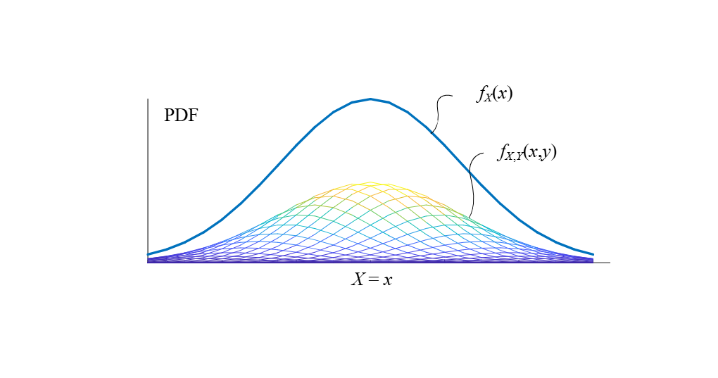

经过归一化：$$f_{X|Y}(x|y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}$$

才是条件概率密度函数



---



### Integration Limits （Marginal）

**1. Marginal Integral**

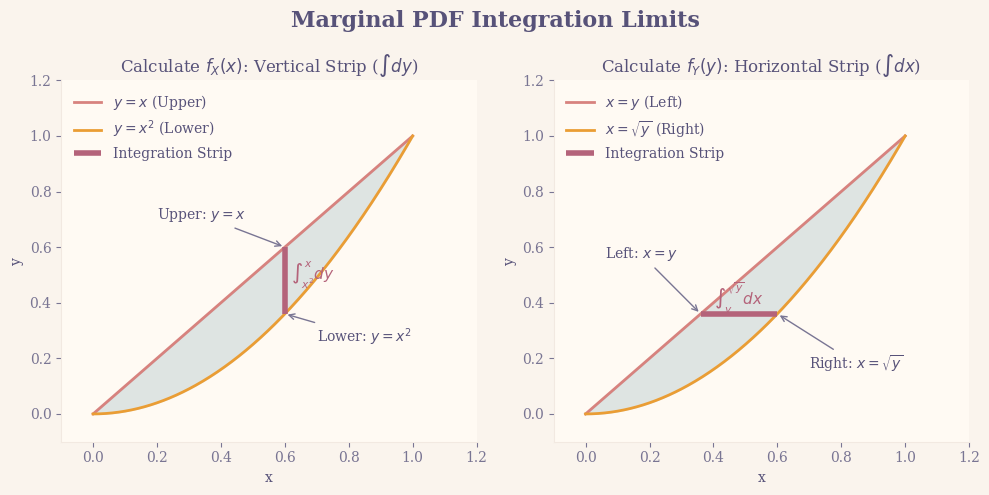

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 定义 Rose Pine Dawn 配色方案 ---
colors = {
    'base': '#faf4ed',      # 背景米色
    'surface': '#fffaf3',   # 稍微亮一点的背景
    'overlay': '#f2e9e1',   # 网格线颜色
    'text': '#575279',      # 主要文字深紫色
    'subtle': '#797593',    # 坐标轴颜色
    'love': '#b4637a',      # 红色系 (用于高亮积分线)
    'gold': '#ea9d34',      # 黄色系 (用于 y=x^2)
    'rose': '#d7827e',      # 粉色系 (用于 y=x)
    'pine': '#286983',      # 深蓝色 (用于填充)
    'foam': '#56949f',      # 青色
    'iris': '#907aa9'       # 紫色
}

# 设置全局绘图风格
plt.rcParams['figure.facecolor'] = colors['base']
plt.rcParams['axes.facecolor'] = colors['surface']
plt.rcParams['text.color'] = colors['text']
plt.rcParams['axes.labelcolor'] = colors['text']
plt.rcParams['xtick.color'] = colors['subtle']
plt.rcParams['ytick.color'] = colors['subtle']
plt.rcParams['axes.edgecolor'] = colors['overlay']
plt.rcParams['font.family'] = 'serif'
# 如果你想显示中文，需要设置支持中文的字体，例如 SimHei 或 Microsoft YaHei
# plt.rcParams['font.sans-serif'] = ['SimHei']

# --- 2. 准备数据 ---
x = np.linspace(0, 1, 400)
y_line = x          # y = x
y_parabola = x**2   # y = x^2

# 创建画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Marginal PDF Integration Limits', fontsize=16, weight='bold', color=colors['text'])

# ==========================================
# 子图 1: 求 f_X(x) (垂直穿线)
# ==========================================
ax1.set_title(r"Calculate $f_X(x)$: Vertical Strip ($\int dy$)", fontsize=12)

# 画边界曲线
ax1.plot(x, y_line, color=colors['rose'], label=r'$y=x$ (Upper)', linewidth=2)
ax1.plot(x, y_parabola, color=colors['gold'], label=r'$y=x^2$ (Lower)', linewidth=2)

# 填充区域
ax1.fill_between(x, y_parabola, y_line, color=colors['pine'], alpha=0.15)

# 画“穿线” (取 x = 0.6 处)
x_fix = 0.6
y_bottom = x_fix**2
y_top = x_fix
ax1.vlines(x=x_fix, ymin=y_bottom, ymax=y_top, color=colors['love'], linewidth=4, label='Integration Strip')

# 标注关键点和箭头
ax1.annotate('Upper: $y=x$', xy=(x_fix, y_top), xytext=(x_fix-0.4, y_top+0.1),
             arrowprops=dict(arrowstyle='->', color=colors['subtle']), color=colors['text'])
ax1.annotate('Lower: $y=x^2$', xy=(x_fix, y_bottom), xytext=(x_fix+0.1, y_bottom-0.1),
             arrowprops=dict(arrowstyle='->', color=colors['subtle']), color=colors['text'])
ax1.text(x_fix + 0.02, (y_top+y_bottom)/2, r'$\int_{x^2}^{x} dy$', color=colors['love'], fontsize=11, weight='bold')

ax1.set_xlim(-0.1, 1.2)
ax1.set_ylim(-0.1, 1.2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc='upper left', frameon=False)


# ==========================================
# 子图 2: 求 f_Y(y) (水平穿线)
# ==========================================
ax2.set_title(r"Calculate $f_Y(y)$: Horizontal Strip ($\int dx$)", fontsize=12)

# 画边界曲线 (同样的曲线，但我们关注左右关系)
ax2.plot(x, y_line, color=colors['rose'], label=r'$x=y$ (Left)', linewidth=2)
ax2.plot(x, y_parabola, color=colors['gold'], label=r'$x=\sqrt{y}$ (Right)', linewidth=2)

# 填充区域
ax2.fill_between(x, y_parabola, y_line, color=colors['pine'], alpha=0.15)

# 画“穿线” (取 y = 0.36 处)
y_fix = 0.36
x_left = y_fix          # x = y
x_right = np.sqrt(y_fix) # x = sqrt(y)
ax2.hlines(y=y_fix, xmin=x_left, xmax=x_right, color=colors['love'], linewidth=4, label='Integration Strip')

# 标注关键点
ax2.annotate('Left: $x=y$', xy=(x_left, y_fix), xytext=(x_left-0.3, y_fix+0.2),
             arrowprops=dict(arrowstyle='->', color=colors['subtle']), color=colors['text'])
ax2.annotate(r'Right: $x=\sqrt{y}$', xy=(x_right, y_fix), xytext=(x_right+0.1, y_fix-0.2),
             arrowprops=dict(arrowstyle='->', color=colors['subtle']), color=colors['text'])
ax2.text((x_left+x_right)/2, y_fix + 0.03, r'$\int_{y}^{\sqrt{y}} dx$', color=colors['love'], fontsize=11, weight='bold', ha='center')

ax2.set_xlim(-0.1, 1.2)
ax2.set_ylim(-0.1, 1.2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc='upper left', frameon=False)

# 调整布局
plt.tight_layout()
plt.show()

**2. Double Integral**

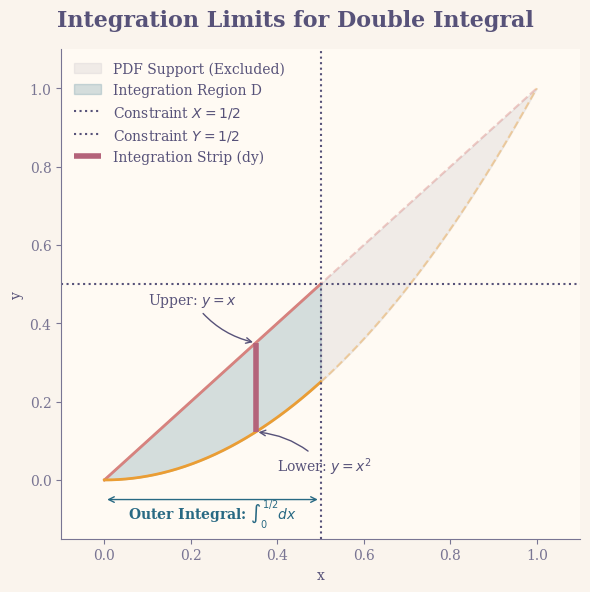

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Rose Pine Dawn 配色表 ---
colors = {
    'base': '#faf4ed',      # 米色背景
    'surface': '#fffaf3',   # 绘图区背景
    'text': '#575279',      # 深紫灰文字
    'subtle': '#797593',    # 辅助线/坐标轴
    'love': '#b4637a',      # 红色高亮 (积分微元)
    'gold': '#ea9d34',      # 黄色 (下边界)
    'rose': '#d7827e',      # 粉色 (上边界)
    'pine': '#286983',      #以此色填充有效积分区
    'foam': '#56949f',      # 辅助色
    'highlight_bg': '#cecacd' # 无效区域的淡色填充
}

# 全局绘图风格设置
plt.rcParams['figure.facecolor'] = colors['base']
plt.rcParams['axes.facecolor'] = colors['surface']
plt.rcParams['text.color'] = colors['text']
plt.rcParams['axes.labelcolor'] = colors['text']
plt.rcParams['xtick.color'] = colors['subtle']
plt.rcParams['ytick.color'] = colors['subtle']
plt.rcParams['axes.edgecolor'] = colors['subtle'] # 边框颜色稍深一点
plt.rcParams['font.family'] = 'serif'
# 如需中文请解开下面注释并替换为你电脑里的字体
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# --- 2. 准备数据 ---
# 完整定义域范围 x in [0, 1]
x_full = np.linspace(0, 1, 400)
y_upper_full = x_full
y_lower_full = x_full**2

# 实际积分范围 x in [0, 0.5]
x_integ = np.linspace(0, 0.5, 400)
y_upper_integ = x_integ
y_lower_integ = x_integ**2

# 创建画布
fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle(r"Integration Limits for Double Integral", fontsize=16, weight='bold', y=0.98)

# --- 3. 绘图逻辑 ---

# A. 画出两条边界曲线 (为了视觉完整性，画出0到1的全长)
ax.plot(x_full, y_upper_full, color=colors['rose'], alpha=0.4, linestyle='--')
ax.plot(x_full, y_lower_full, color=colors['gold'], alpha=0.4, linestyle='--')

# B. 填充 "被截断" 的无效部分 (x > 0.5 的部分) - 用淡灰色表示
ax.fill_between(x_full, y_lower_full, y_upper_full, where=(x_full > 0.5),
                color=colors['highlight_bg'], alpha=0.3, label='PDF Support (Excluded)')

# C. 填充 "有效积分区域" (x <= 0.5) - 用深蓝色高亮
ax.fill_between(x_integ, y_lower_integ, y_upper_integ,
                color=colors['pine'], alpha=0.2, label='Integration Region D')
# 给有效区域加个实线边框
ax.plot(x_integ, y_upper_integ, color=colors['rose'], linewidth=2)
ax.plot(x_integ, y_lower_integ, color=colors['gold'], linewidth=2)

# D. 画出题目给定的限制边界 (x=0.5, y=0.5)
ax.axvline(x=0.5, color=colors['text'], linestyle=':', linewidth=1.5, label='Constraint $X=1/2$')
ax.axhline(y=0.5, color=colors['text'], linestyle=':', linewidth=1.5, label='Constraint $Y=1/2$')

# E. 画 "穿线" (积分微元 Strip)
x_strip = 0.35  # 在 0 到 0.5 之间选一个位置
y_strip_low = x_strip**2
y_strip_high = x_strip
ax.vlines(x=x_strip, ymin=y_strip_low, ymax=y_strip_high,
          color=colors['love'], linewidth=4, label='Integration Strip (dy)')

# --- 4. 标注与说明 ---

# 标注积分微元的上下限
ax.annotate(r'Upper: $y=x$', xy=(x_strip, y_strip_high), xytext=(x_strip-0.25, y_strip_high+0.1),
            arrowprops=dict(arrowstyle='->', color=colors['text'], connectionstyle="arc3,rad=0.2"),
            fontsize=10, color=colors['text'])

ax.annotate(r'Lower: $y=x^2$', xy=(x_strip, y_strip_low), xytext=(x_strip+0.05, y_strip_low-0.1),
            arrowprops=dict(arrowstyle='->', color=colors['text'], connectionstyle="arc3,rad=0.2"),
            fontsize=10, color=colors['text'])

# 标注横坐标范围 dx
ax.annotate('', xy=(0, -0.05), xytext=(0.5, -0.05),
            arrowprops=dict(arrowstyle='<->', color=colors['pine']))
ax.text(0.25, -0.1, r'Outer Integral: $\int_0^{1/2} dx$', ha='center', color=colors['pine'], weight='bold')

# 设置坐标轴范围
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.15, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('y')

# 图例
ax.legend(loc='upper left', frameon=False, fontsize=10)

plt.tight_layout()
plt.show()



---



## Joint, Conditional, Marginal Probability

根据贝叶斯定理，联合概率、边缘概率、条件概率三者关系为：$$\underbrace{f_{X,Y}(x,y)}_{\text{Joint}} = \underbrace{f_{X|Y}(x|y)}_{\text{Conditional}} \underbrace{f_Y(y)}_{\text{Marginal}} = \underbrace{f_{Y|X}(y|x)}_{\text{Conditional}} \underbrace{f_X(x)}_{\text{Marginal}} $$

连续随机变量 $X$ 的边缘分布概率密度函数 $f_X(x)$ 可以通过下式获得：$$\underbrace{f_X(x)}_{\text{Marginal}} = \int_{-\infty}^{+\infty} \underbrace{f_{X,Y}(x,y)}_{\text{Joint}} \mathrm{d}y = \int_{-\infty}^{+\infty} \underbrace{f_{X|Y}(x|t)}_{\text{Conditional}} \underbrace{f_Y(t)}_{\text{Marginal}} \mathrm{d}t $$

 $f_Y(y)$ 同理

## Independency

$X$ 与 $Y$ 相互独立 $\iff$ 必须同时满足以下两个条件：

1. 因子分解条件：联合概率密度函数 $f(x,y)$ 可以分解为 $g(x) \cdot h(y)$ 的形式。
2. 定义域条件：$f(x,y) > 0$ 的区域（定义域）必须是矩形。（包括无界矩形，如整个第一象限,$x>0, y>0$ ）

# Expectation

1. 题目明确说明“相互独立” (Mutually Independent)

   直接使用公式： $$E(XY) = E(X) \cdot E(Y)$$
2. 题目未说明独立，或明确说明“不独立”

   判断： 题目给出的是一个联合概率密度函数 $f(x,y)$，且该函数无法分解为 $g(x)h(y)$ 的形式；或者题目中有协方差 $Cov(X,Y) \neq 0$。
   
   使用联合分布密度的定义进行二重积分： $$E(XY) = \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} x \cdot y \cdot f(x,y) \,dx\,dy$$
   注意： 如果题目给出了协方差 $Cov(X,Y)$，也可以用关系式：$$E(XY) = Cov(X,Y) + E(X)E(Y)$$



**1.   Taylor Series**



定义式：$$E\left[\frac{1}{X+1}\right] = \sum_{k=0}^{\infty} \frac{1}{k+1} \cdot \frac{\lambda^k}{k!} e^{-\lambda}$$

提取常数 (Factor out constants)：$e^{-\lambda}$ 与求和变量 $k$ 无关，移到求和号外面。$$= e^{-\lambda} \sum_{k=0}^{\infty} \frac{\lambda^k}{(k+1)!}$$

调整幂次 (Adjust Powers)：分母是 $(k+1)!$，分子是 $\lambda^k$。为了凑成标准形式 $\frac{x^n}{n!}$，分子需要变成 $\lambda^{k+1}$。我们在求和号内 乘 $\lambda$ 除 $\lambda$ (假设 $\lambda > 0$)。$$= \frac{e^{-\lambda}}{\lambda} \sum_{k=0}^{\infty} \frac{\lambda^{k+1}}{(k+1)!}$$

变量代换 (Change of Index)：令 $j = k+1$。当 $k=0$ 时，$j=1$。当 $k \to \infty$ 时，$j \to \infty$。$$= \frac{e^{-\lambda}}{\lambda} \sum_{j=1}^{\infty} \frac{\lambda^j}{j!}$$

根据$e^{\lambda}$ 的麦克劳林级数展开：$$e^{\lambda} = \sum_{j=0}^{\infty} \frac{\lambda^j}{j!} = 1 + \sum_{j=1}^{\infty} \frac{\lambda^j}{j!}$$

原式：$$= \frac{e^{-\lambda} \cdot e^{\lambda} - e^{-\lambda}}{\lambda} = \frac{1 - e^{-\lambda}}{\lambda}$$

**2. Integral Representation**

引入积分形式：$$\frac{1}{k+1} = \int_{0}^{1} t^k \, dt$$

代入原求和式：$$E\left[\frac{1}{X+1}\right] = \sum_{k=0}^{\infty} \left( \int_{0}^{1} t^k \, dt \right) \frac{\lambda^k}{k!} e^{-\lambda}$$

交换求和与积分次序 (Swap Sum and Integral)：由于所有项均为正数（由富比尼定理 Fubini's Theorem 保证），我们可以交换次序：$$= e^{-\lambda} \int_{0}^{1} \left( \sum_{k=0}^{\infty} \frac{(\lambda t)^k}{k!} \right) dt$$

识别级数 (Identify Series)：括号内的求和式 $\sum_{k=0}^{\infty} \frac{(\lambda t)^k}{k!}$ 正是 $e^{\lambda t}$ 的泰勒展开。$$= e^{-\lambda} \int_{0}^{1} e^{\lambda t} \, dt$$

计算定积分 (Compute Definite Integral)：$$= e^{-\lambda} \left[ \frac{1}{\lambda} e^{\lambda t} \right]_{t=0}^{1}$$$$= e^{-\lambda} \cdot \frac{1}{\lambda} (e^{\lambda \cdot 1} - e^{\lambda \cdot 0})$$$$= \frac{e^{-\lambda}}{\lambda} (e^{\lambda} - 1)$$化简：$$= \frac{1 - e^{-\lambda}}{\lambda}$$